**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Standard modules needed
import numpy as np
from types import SimpleNamespace
from scipy import optimize
import sympy as sm
from examproject import *
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 11})

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

Solving the maximization analytically using sympy module:

In [2]:
#setting symbols
alpha = sm.symbols('alpha')
kappa = sm.symbols('kappa')
nu = sm.symbols('nu')
w = sm.symbols('w')
tau = sm.symbols('tau')
C = sm.symbols('C')
G = sm.symbols('G')
L = sm.symbols('L')

In [3]:
obj1 = sm.log(C**alpha * (G**(1-alpha)))-nu*(L**2/2) #defining objective function
obj1

-L**2*nu/2 + log(C**alpha*G**(1 - alpha))

In [4]:
C = kappa + (1-tau)*w*L
obj2 = sm.log(C**alpha * (G**(1-alpha)))-nu*(L**2/2) #substituting C
obj2

-L**2*nu/2 + log(G**(1 - alpha)*(L*w*(1 - tau) + kappa)**alpha)

In [5]:
foc = sm.diff(obj2,L) #deriving FOC
foc

G**(1 - alpha)*G**(alpha - 1)*alpha*w*(1 - tau)/(L*w*(1 - tau) + kappa) - L*nu

In [6]:
L_star = sm.solve(foc, L) #solving for L
L_star = L_star[0]
L_star_f = sm.lambdify((alpha,kappa,nu,w,tau,G),L_star) #creating a python function
L_star

(kappa*nu - sqrt(nu*(4*alpha*tau**2*w**2 - 8*alpha*tau*w**2 + 4*alpha*w**2 + kappa**2*nu)))/(2*nu*w*(tau - 1))

Solving optimization problem numerically using scipy module:

In [7]:
#setting parameters
alpha = 0.5
kappa = 1
nu = 1/(2*(16**2))
tau = 0.3
w = 1
G_values = [1,2]

In [8]:
#printing. calling L_star_f() function and sol() function which can be found in the .py file
print(f'analytical solution with G=1: {L_star_f(alpha,kappa,nu,w,tau,G_values[0])}')
print(f'numerical solution with G=1: {sol(alpha,kappa,nu,w,tau,G_values[0])}')
print(f'analytical solution with G=2: {L_star_f(alpha,kappa,nu,w,tau,G_values[1])}')
print(f'numerical solution with G=2: {sol(alpha,kappa,nu,w,tau,G_values[1])}')

analytical solution with G=1: 15.30165022719559
numerical solution with G=1: [15.3016297]
analytical solution with G=2: 15.30165022719559
numerical solution with G=2: [15.30162482]


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

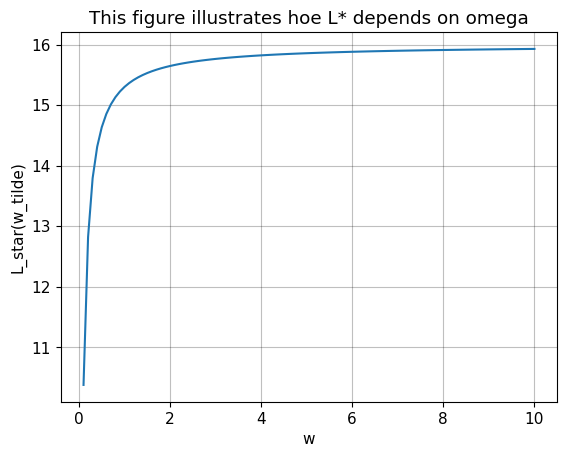

In [9]:
w_ = np.linspace(0.1,10,100) #w_ contains 100 values of w between 0.1 and 10
L = np.empty(100)

for i,om in enumerate(w_):
    L[i] = L_star_f(alpha,kappa,nu,om,tau,G_values[0]) #L contains the respective 100 optimal values of L

#plotting
fig = plt.figure()
plt.plot(w_,L)
plt.xlabel("w")
plt.ylabel("L_star(w_tilde)")
plt.title("This figure illustrates hoe L* depends on omega")
plt.show()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [10]:
res = solve(alpha,kappa,nu,w,tau) #calling solve() function which can be found in the .py file
res

(array([22.28392615]), 1.6913376531043847)

/Users/michelescola/Desktop/PROGRAMMING/projects-2023-michele-scola/examproject/examproject.py:31: RuntimeWarning: divide by zero encountered in log
  return np.log(C**alpha*(G**(1-alpha)))-nu*((L**2)/2)
/Users/michelescola/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


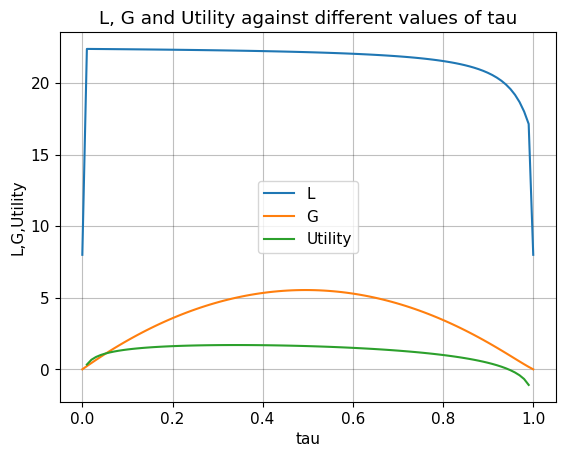

In [11]:
tau_=np.linspace(0,1,100) #tau_ contains 100 values of tau between 0 and 1
L_= np.empty(100) #L_ contains the respective oprimal values of L
G_= np.empty(100) #G_ contains the respective values of G
U_= np.empty(100) #U_ contains the respective values of U

for i,tau in enumerate(tau_):
    res = solve(alpha,kappa,nu,w,tau)
    L_[i] = res[0]
    G_[i] = tau * w * res[0] * ((1-tau)*w)
    U_[i] = res[1]

#plotting
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(tau_,L_,label='L')
ax.plot(tau_,G_,label='G')
ax.plot(tau_,U_,label='Utility')
ax.set_title('L, G and Utility against different values of tau')
ax.set_xlabel('tau')
ax.set_ylabel('L,G,Utility')
ax.legend(loc='center');

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [12]:
res = solve_tau(alpha,kappa,nu,w) #calling solve_tau() function which can be found in the .py file
print(f'optimal value of tau is {res[1]}')

optimal value of tau is 0.34057265736435455


A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

SET 1

In [13]:
#set 1 paramaters
sigma = 1.001
p = 1.001
eps = 1
tau = res[1]

In [14]:
res = solve2(alpha,kappa,nu,w,tau,sigma,p,eps) #calling solve2() function which can be found in the .py file
L = res
G = tau*w*L*((1-tau)*w) #calculating G
print(f'G = {G}')

G = [0.12844494]


SET 2

In [15]:
#set 2 parameters
sigma = 1.5
p = 1.5
eps = 1

In [16]:
res = solve2(alpha,kappa,nu,w,tau,sigma,p,eps) #calling solve2() function which can be found in the .py file
L = res
G = tau*w*L*((1-tau)*w) #calculating G
print(f'G = {G}')

G = [2.81392454]


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

SET 1

In [17]:
#set 1 parameters
sigma = 1.001
p = 1.001
eps = 1

In [18]:
res = solve_tau2(alpha,kappa,nu,w,sigma,p,eps) #calling solve_tau2() function which can be found in the .py file
print(f'tau = {res[1]}')

tau = 0.44936775113498867


SET 2

In [19]:
#set 2 parameters
sigma = 1.5
p = 1.5
eps = 1

In [20]:
res = solve_tau2(alpha,kappa,nu,w,sigma,p,eps) #calling solve_tau2() function which can be found in the .py file
print(f'tau = {res[1]}')

tau = 0.29410566107930575


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [21]:
#setting parameters
par = SimpleNamespace()
par.eta = 0.5
par.w = 1
par.kappa = 1

In [22]:
res = solve3(par) #calling solve3() function which can be found in the .py file
print(f'numerical solution: {res[0]}')
print(f'analytical solution: {lt(par)}') #calling lt() function which can be found in the .py file

numerical solution: [0.24999999]
analytical solution: 0.25


In [23]:
par.kappa = 2 #changing kappa
res = solve3(par) #calling solve3() function which can be found in the .py file
print(f'numerical solution: {res[0]}')
print(f'analytical solution: {lt(par)}') #calling lt() function which can be found in the .py file

numerical solution: [1.00000002]
analytical solution: 1.0


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [24]:
#setting new parameters
par.rho = 0.90
par.iota = 0.01
par.sigma_e = 0.10
par.R = (1+0.01)**(1/12)
par.K = 2000

In [25]:
H = simulation(par) #calling simulation() function which can be found in the .py file
H

/Users/michelescola/Desktop/PROGRAMMING/projects-2023-michele-scola/examproject/examproject.py:125: RuntimeWarning: invalid value encountered in log
  par.kappa = par.rho*(np.log(k-1)) + eps[t] #update kappa
/Users/michelescola/Desktop/PROGRAMMING/projects-2023-michele-scola/examproject/examproject.py:125: RuntimeWarning: divide by zero encountered in log
  par.kappa = par.rho*(np.log(k-1)) + eps[t] #update kappa


1890.096452617615

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [26]:
delta = 0.05 #setting delta
H = simulation2(par,delta) #calling simulation2() function which can be found in the .py file
H

/Users/michelescola/Desktop/PROGRAMMING/projects-2023-michele-scola/examproject/examproject.py:143: RuntimeWarning: invalid value encountered in log
  par.kappa = par.rho*(np.log(k-1-1)) + eps[t-1] #previous kappa
/Users/michelescola/Desktop/PROGRAMMING/projects-2023-michele-scola/examproject/examproject.py:146: RuntimeWarning: invalid value encountered in log
  par.kappa = par.rho*(np.log(k-1)) + eps[t] #update kappa
/Users/michelescola/Desktop/PROGRAMMING/projects-2023-michele-scola/examproject/examproject.py:146: RuntimeWarning: divide by zero encountered in log
  par.kappa = par.rho*(np.log(k-1)) + eps[t] #update kappa
/Users/michelescola/Desktop/PROGRAMMING/projects-2023-michele-scola/examproject/examproject.py:143: RuntimeWarning: divide by zero encountered in log
  par.kappa = par.rho*(np.log(k-1-1)) + eps[t-1] #previous kappa


1773.5606813351105

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [27]:
obj = lambda x: -simulation2(par,x) #creating objective function
res = optimize.minimize(obj,[0.05],method='SLSQP',bounds=[(0,0.5)],tol=1e-8) #maximizing obj function to find optimal delta
res.x

array([0.05])

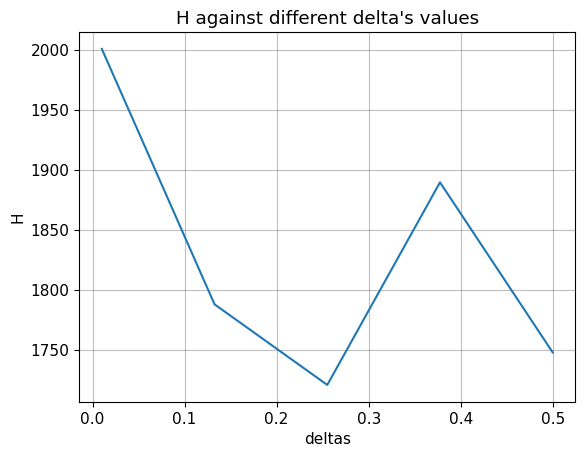

In [28]:
deltas = np.linspace(0.01,0.5,5) #deltas contains 5 values of delta between 0.01 and 0.5
F = np.empty(5) #F contains the respective values of H

for i, delta in enumerate(deltas):
    F[i] = simulation2(par,delta)

fig = plt.figure()
plt.plot(deltas,F)
plt.xlabel("deltas")
plt.ylabel("H")
plt.title("H against different delta's values")
plt.show()


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In the alternative policy I suggest, for each period i calculate the profit in the prevoius period; if it's positive I increase assumptions of a fixed proportion a (0.2); if the profit is negative I reduce assumptions of a fixed proportion b. This should increase profitability of the hair saloon.

In [29]:
#setting a and b
par.a = 0.2
par.b = 0.1

In [30]:
H = simulation3(par) #calling simulation3() function which can be found in the .py file
H

/Users/michelescola/Desktop/PROGRAMMING/projects-2023-michele-scola/examproject/examproject.py:170: RuntimeWarning: invalid value encountered in log
  par.kappa = par.rho*(np.log(k-1)) + eps[t]
/Users/michelescola/Desktop/PROGRAMMING/projects-2023-michele-scola/examproject/examproject.py:170: RuntimeWarning: divide by zero encountered in log
  par.kappa = par.rho*(np.log(k-1)) + eps[t]
/Users/michelescola/Desktop/PROGRAMMING/projects-2023-michele-scola/examproject/examproject.py:177: RuntimeWarning: invalid value encountered in double_scalars
  profit = par.kappa*(l_opt**(1-par.eta)) - par.w*l_opt - 1*(l_opt!=l_opt)*par.iota
/Users/michelescola/Desktop/PROGRAMMING/projects-2023-michele-scola/examproject/examproject.py:172: RuntimeWarning: invalid value encountered in double_scalars
  profit_ = par.kappa*(l_opt**(1-par.eta)) - par.w*l_opt - 1*(l_opt!=l_opt)*par.iota


1322.1626196196207

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [31]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [32]:
#setting parameters
low_bound = -600
high_bound = 600
tol = 1e-8
K_=10
K=1000

In [33]:
def optimizer(low_bound, high_bound, tol, K_, K):
    """
    args:
    low_bound = lower bound for x
    high_bound = higher bound for x
    tol = tolerance
    K_ = number of warm-up iteration
    K = maximum number of iteration

    return:
    x_star = final value of x1 and x2
    x_k0s0 = list with all initial guesses of x1
    x_k0s1 = list with all initial guesses of x2
    N = number of iteration
    """
    x_star = [0,0]
    x_k0s0 =[]
    x_k0s1 =[]
    for k in range(K): #3. K iterations
        x_k = np.random.uniform(low_bound,high_bound,2) #3a. draw random x^k uniformly between bounds
        if k < K_: #3b.
            opt = optimize.minimize(griewank,x_k,method='BFGS',tol=tol) #3e. run optimizer
            x_k0s0.append(x_k[0]) #saving initial guesses
            x_k0s1.append(x_k[1]) #saving initial guesses
            x_kstar = opt.x
            s1 = griewank_(x_kstar[0],x_kstar[1]) #s1 = f(x^k*)
            s2 = griewank_(x_star[0],x_star[1]) #s2 = f(x^*)
            if k==0 or s1 < s2: #3f. set x_star = x_kstar
                x_star = x_kstar
            s3 = griewank_(x_star[0],x_star[1]) #s3 = f(x^*)
            if s3 < tol: #3.g
                N=k+1
                break
        else:
            chi_k = 0.50*2/(1+np.exp((k-K_)/100)) #3c. calulating chi
            x_k0 = chi_k*x_k + (1-chi_k)*x_star #3d. set x_k0
            x_k0s0.append(x_k0[0]) #saving initial guesses
            x_k0s1.append(x_k0[1]) #saving initial guesses
            opt = optimize.minimize(griewank,x_k0,method='BFGS',tol=tol) #3e. run optimizer
            x_kstar = opt.x
            s1 = griewank_(x_kstar[0],x_kstar[1]) #s1 = f(x^k*)
            s2 = griewank_(x_star[0],x_star[1]) #s2 = f(x^*)
            if k==0 or s1 < s2: #3f. set x_star = x_kstar
                x_star = x_kstar
            s3 = griewank_(x_star[0],x_star[1]) #s3 = f(x^*)
            if s3 < tol: #3.g
                N=k+1
                break
    return x_star, x_k0s0, x_k0s1, N #4.

In [34]:
x_opt = optimizer(low_bound, high_bound, tol, K_, K) #calling optimizer() function
x_opt[0]

array([-1.62778413e-08, -1.87806999e-08])

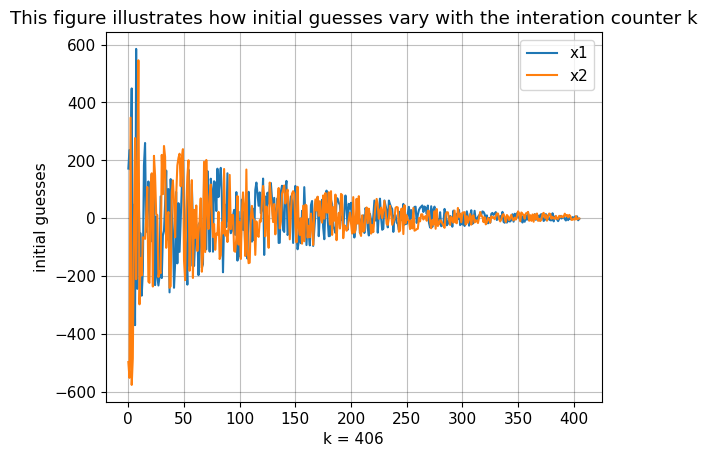

In [35]:
#plotting initial guesses variation against iterations
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(x_opt[3]),x_opt[1],label='x1')
ax.plot(range(x_opt[3]),x_opt[2],label='x2')
ax.set_title('This figure illustrates how initial guesses vary with the interation counter k')
ax.set_xlabel(f'k = {x_opt[3]}')
ax.set_ylabel('initial guesses')
ax.legend(loc='upper right')

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [36]:
K_=100 #setting warm-up number of iteration to 100
x_opt = optimizer(low_bound, high_bound, tol, K_, K) #calling optimizer()
x_opt[0]

array([-8.68415198e-09, -1.20701819e-08])

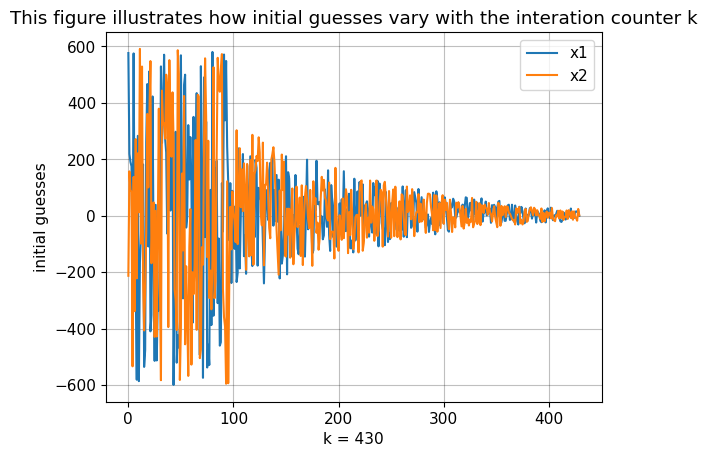

In [37]:
#plotting initial guesses variation against iterations
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(x_opt[3]),x_opt[1],label='x1')
ax.plot(range(x_opt[3]),x_opt[2],label='x2')
ax.set_title('This figure illustrates how initial guesses vary with the interation counter k')
ax.set_xlabel(f'k = {x_opt[3]}')
ax.set_ylabel('initial guesses')
ax.legend(loc='upper right')

With $\underline{K} = 100$ the convergence is slitghtly slower. This trend become bigger if we change $\underline{K}$ to 200 or more